In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), _ = mnist.load_data()

# Reshape images to (28, 28, 1) and normalize pixel values to range [0, 1]
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Randomly select 1000 images
random_indices = np.random.choice(len(train_images), size=1000, replace=False)
random_images = train_images[random_indices]

print("Shape of randomly selected 1000 images:", random_images.shape)


Shape of randomly selected 1000 images: (1000, 28, 28, 1)


In [19]:
import numpy as np
from sklearn.decomposition import PCA

# Flatten the images
flattened_images = random_images.reshape(random_images.shape[0], -1)

# Initialize PCA with the number of components explaining 95% variance
pca = PCA(n_components=0.95)

# Fit PCA on the flattened images
pca.fit(flattened_images)

# Transform the images to the reduced dimension
reduced_images = pca.transform(flattened_images)

print("Original image shape:", flattened_images.shape)
print("Reduced image shape:", reduced_images.shape)
print("Explained variance ratio:", np.sum(pca.explained_variance_ratio_))


Original image shape: (1000, 784)
Reduced image shape: (1000, 133)
Explained variance ratio: 0.9500489


In [20]:
import numpy as np
from sklearn.decomposition import PCA

# Flatten the images
flattened_images = random_images.reshape(random_images.shape[0], -1)

# Initialize PCA with the number of components explaining 95% variance
pca = PCA(n_components=0.95)

# Fit PCA on the flattened images
pca.fit(flattened_images)

# Get the number of principal components required to explain 95% variance
num_components_for_95_variance = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

print("Number of principal components required to explain 95% variance:", num_components_for_95_variance)


Number of principal components required to explain 95% variance: 133


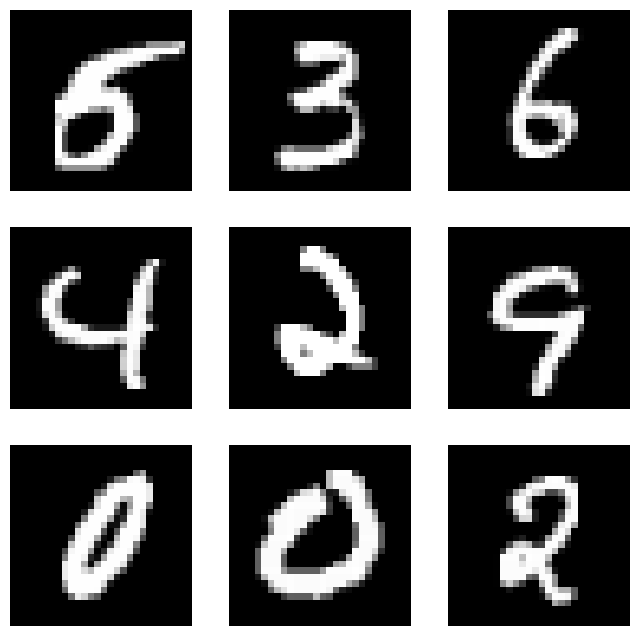

In [21]:
import matplotlib.pyplot as plt

# Plot 9 actual images in a 3x3 grid
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(random_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


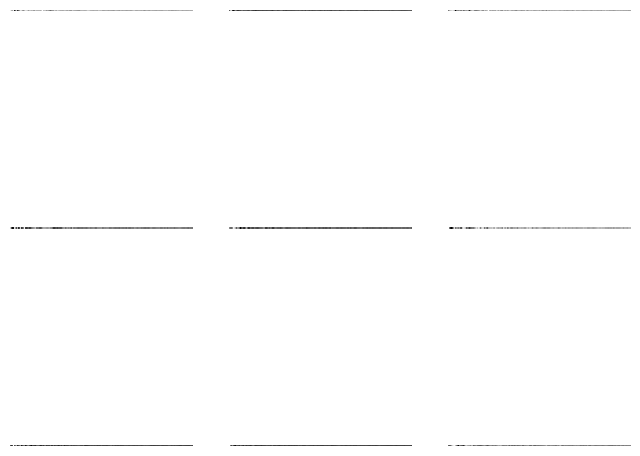

In [26]:
reduced_images = pca.transform(flattened_images)

# Plot 9 images after dimensionality reduction in a 3x3 grid
plt.figure(figsize=(8,8)),
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(reduced_images[i].reshape(-1, num_components_for_95_variance), cmap='gray')
    plt.axis('off')
plt.show()

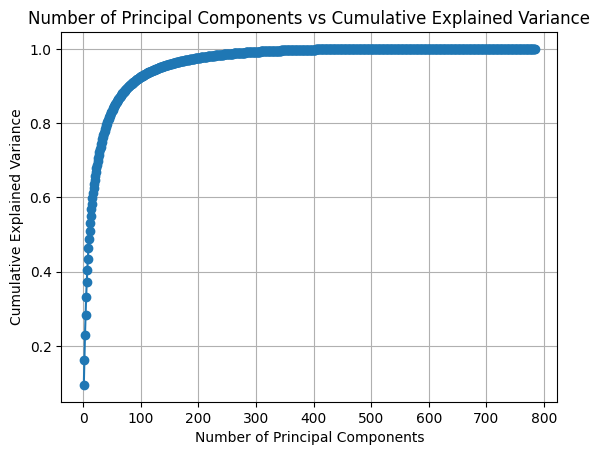

In [27]:
from sklearn.decomposition import PCA

# Flatten the images
flattened_images = random_images.reshape(random_images.shape[0], -1)

# Initialize PCA
pca = PCA()

# Fit PCA on the flattened images
pca.fit(flattened_images)

# Get cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot graph
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Number of Principal Components vs Cumulative Explained Variance')
plt.grid(True)
plt.show()